In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("1645792390_cep1_dataset.xlsx")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.describe()  #2.a

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [6]:
#There are 0 null values in dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
"""
Lets check how many 0 values are present for features restecg,oldpeak,slope
"""
print(df.restecg.value_counts())
print(df.oldpeak.value_counts())
print(df.slope.value_counts())

"""
We can see that restecg might be a categoraical value .So lets not replace 0 values for it.
There are less 0 values for slope. For old peak we will use it as it is if low accuraacy we will
replace 0 values with median in next model.
"""

1    152
0    147
2      4
Name: restecg, dtype: int64
0.0    99
1.2    17
0.6    14
1.0    14
0.8    13
1.4    13
0.2    12
1.6    11
1.8    10
0.4     9
2.0     9
0.1     7
2.6     6
2.8     6
1.9     5
1.5     5
0.5     5
3.0     5
2.2     4
3.6     4
2.4     3
3.4     3
4.0     3
0.9     3
0.3     3
2.3     2
4.2     2
1.1     2
2.5     2
3.2     2
6.2     1
2.1     1
4.4     1
1.3     1
3.1     1
0.7     1
5.6     1
3.8     1
2.9     1
3.5     1
Name: oldpeak, dtype: int64
2    142
1    140
0     21
Name: slope, dtype: int64


'\nWe can see that restecg might be a categoraical value .So lets not replace 0 values for it.\nThere are less 0 values for slope. For old peak we will use it as it is if low accuraacy we will\nreplace 0 values with median in next model.\n'

In [8]:
#converting all coloumns to a single data type
df = df.astype('float64')
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target      float64
dtype: object

In [9]:
df.target.value_counts()

1.0    165
0.0    138
Name: target, dtype: int64

In [10]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


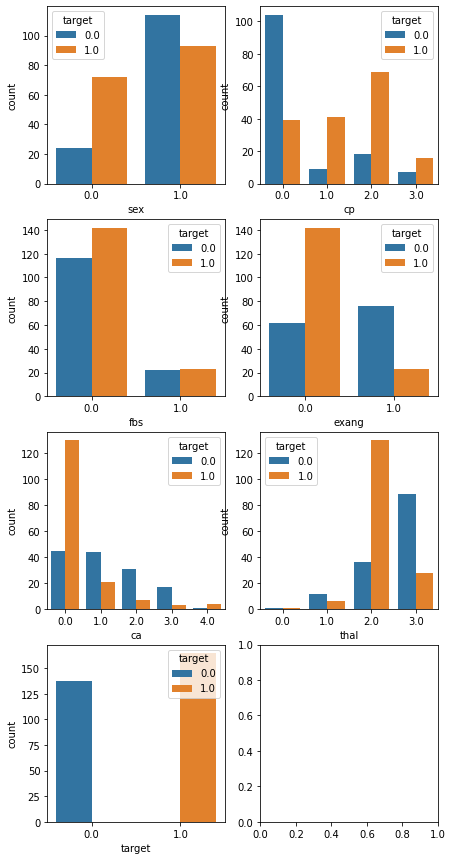

In [11]:
# Let's see all the categorical values grouped by Target values                                2.b 
df_categorical = df[['sex','cp','fbs','exang','ca','thal' ,'target']] 
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(7, 15))
axs = axs.flatten()

for i,column in enumerate(df_categorical.columns):
    sns.countplot(data = df_categorical , x = column ,ax = axs[i] , hue = 'target')
#                                                                                              2.d
# For Age coloumn we can see that females(0) have higher chance of CVD than males.(from aprrox 95-100 females 75 have CVD)
# males(1) have higher count of CVD than females as number of males is significanlty higher than females (from approx 200-230 males 90 have CVD)

<AxesSubplot:xlabel='age', ylabel='Count'>

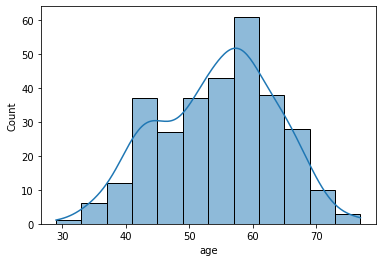

In [12]:
# Let's check how age is distributed in our dataset                                 2.c
sns.histplot(data = df , x='age' , kde = True)
# The age group 40-65 is highest coverage in our dataset

<AxesSubplot:xlabel='age', ylabel='Count'>

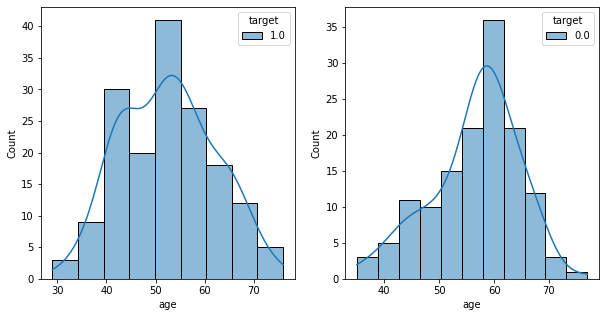

In [13]:
# Now lets see the distribution for ages which have/do not have CVD.
group_target = df.groupby('target')
df_age_1 = group_target.get_group(1)[['age','target','sex']]
df_age_0 = group_target.get_group(0)[['age','target','sex']]
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10,5 ))
axs = axs.flatten()
sns.histplot(data = df_age_1 , x='age' , kde = True , ax = axs[0] , hue = 'target')
sns.histplot(data = df_age_0 , x='age' , kde = True , ax = axs[1] , hue = 'target')
# As seen ages 40-65 have highest counts of CVD

<AxesSubplot:>

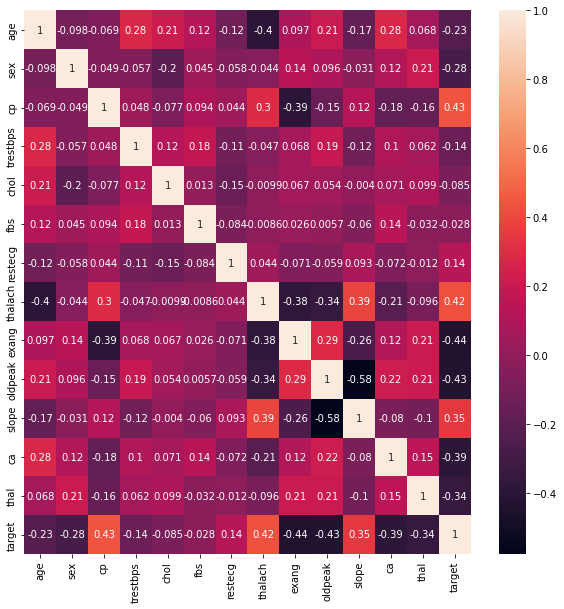

In [14]:
plt.figure(figsize = (10,10))
sns.heatmap(data = df.corr() ,annot = True)

In [15]:
#  1)As seen in corelation matrix trestbps is having a corelation of -0.14 .                        2.e
#    Though corelation is low but as trestbps increases target decreases.
#    So in conclusion detecting heart attack solely based on trestbps is not adviced.
#  2)chol and target have a -0.085 corelation. Close to zero and as chol increases CVD increases    2.f
#    As it is loosely co related it is not a accurate measure for CVD
#  3)exang and oldpeak are exercise related features which are heavily negatively co realted        2.g
#  4)thal is neagtively co related with heart disease.                                              2.h
#  5)cp,thalach,slope are +ly corelated : exang,oldpeak,ca,thal -ly corelated : rest have low co relation  2.i

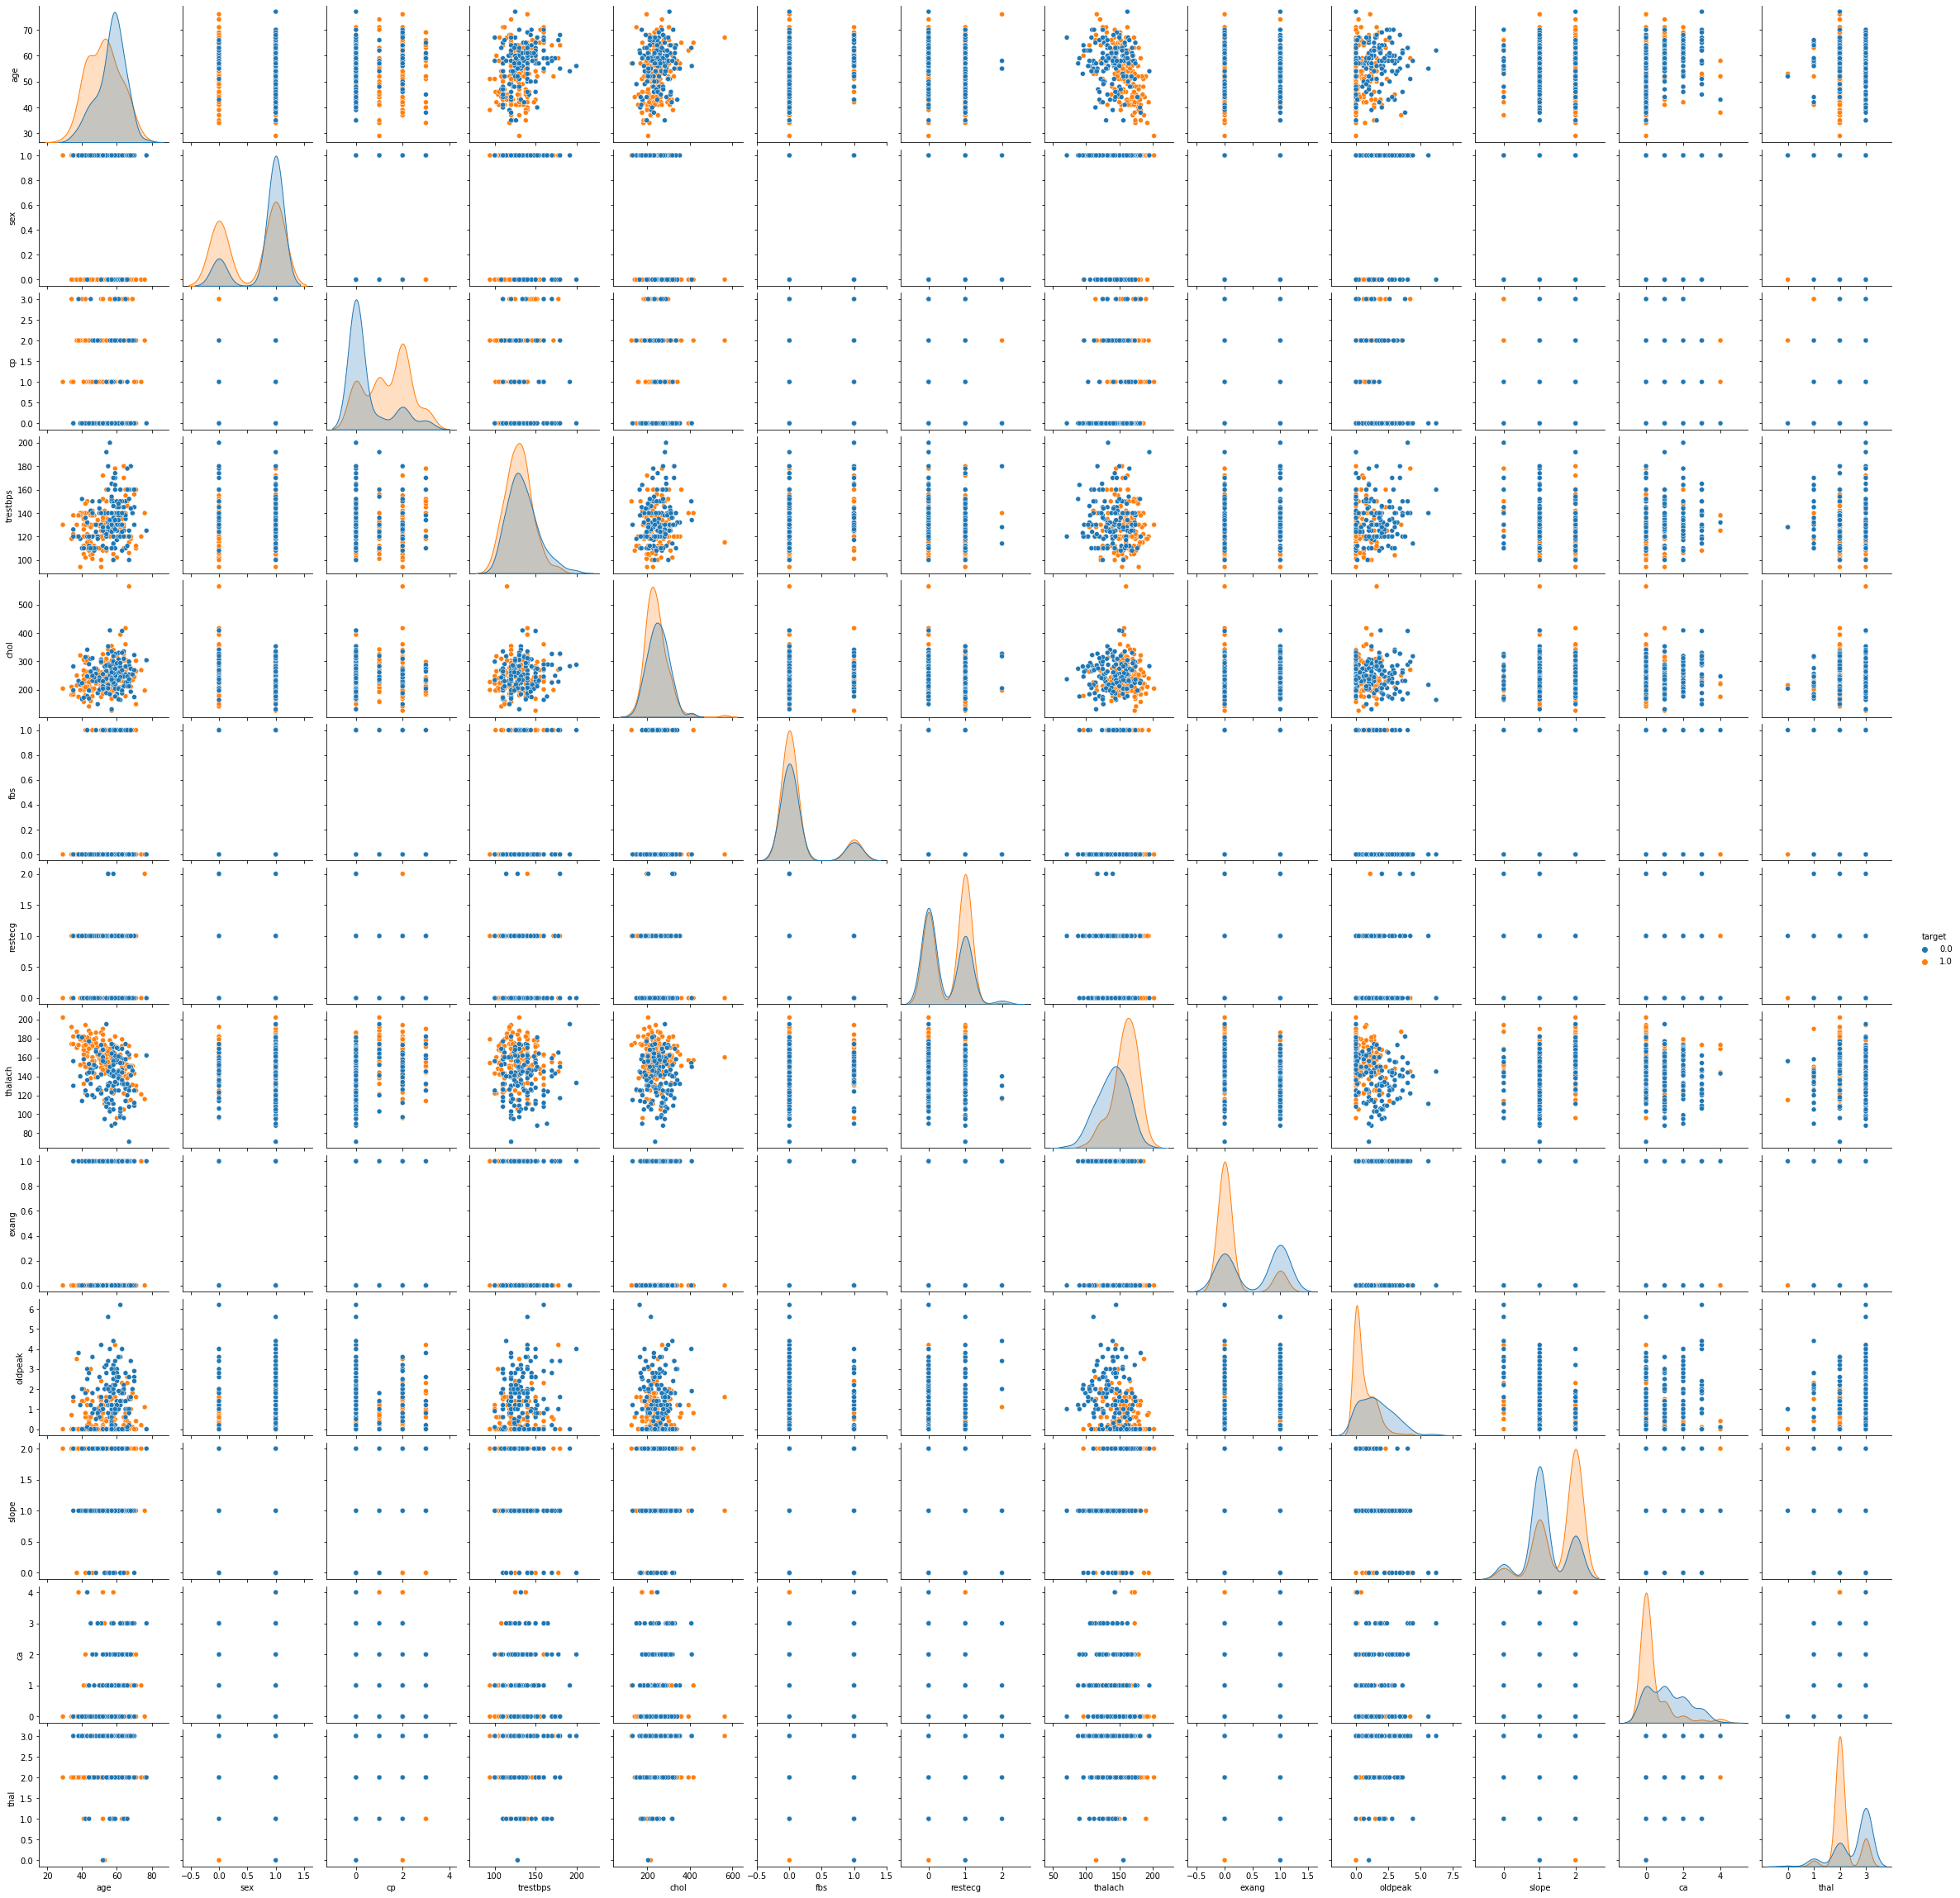

In [17]:
sns.pairplot(data = df, hue = 'target')                                                    #2.j

In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [19]:
X = df.drop('target',axis = 1)
y = df['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)
logr = LogisticRegression()
logr.fit(X_train,y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [28]:
y_pred = logr.predict(X_test)
print(classification_report(y_test, y_pred))
# low f1 score and accuracy

              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79        41
         1.0       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [23]:
logr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [30]:
parameters_grid = {
    'penalty': ['l1', 'l2'],
    'C': np.linspace(1, 50, num=5),
    'solver': ['sag', 'lbfgs'],
    'l1_ratio': [0.25, 0.75],
    'max_iter': np.arange(100, 300, 100)
}
grid = GridSearchCV(logr, parameters_grid, refit = True, verbose = 2,n_jobs=-1)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
200 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Sol

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([ 1.  , 13.25, 25.5 , 37.75, 50.  ]),
                         'l1_ratio': [0.25, 0.75],
                         'max_iter': array([100, 200]), 'penalty': ['l1', 'l2'],
                         'solver': ['sag', 'lbfgs']},
             verbose=2)

In [32]:
print(grid.best_score_)
print(grid.best_params_)

0.8205980066445182
{'C': 50.0, 'l1_ratio': 0.25, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


In [34]:
logr_grid = LogisticRegression(**grid.best_params_, class_weight='balanced')
logr_grid.fit(X_train, y_train)

y_pred_logr_grid = logr_grid.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.78      0.78      0.78        41
         1.0       0.82      0.82      0.82        50

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [46]:
print(classification_report(y_test, y_pred_logr_grid))
print("Accuracy Score",accuracy_score(y_pred_logr_grid,y_test))
print("F1 score",f1_score(y_pred_logr_grid,y_test))

              precision    recall  f1-score   support

         0.0       0.78      0.78      0.78        41
         1.0       0.82      0.82      0.82        50

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91

Accuracy Score 0.8021978021978022
F1 score 0.82


In [39]:
rf = RandomForestClassifier(criterion = 'gini',
                             max_depth = 8,
                             n_estimators=200,
                             min_samples_split=10,
                             random_state=5)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, n_estimators=200,
                       random_state=5)

In [40]:
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79        41
         1.0       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [45]:
print("Accuracy Score",accuracy_score(y_pred_rf,y_test))
print("F1 score",f1_score(y_pred_rf,y_test))

Accuracy Score 0.8131868131868132
F1 score 0.8316831683168315


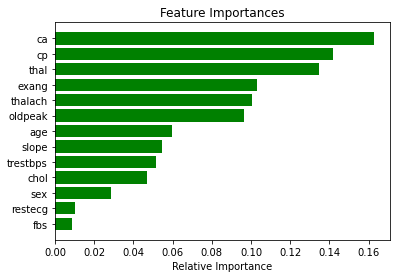

In [47]:
features = df.columns

importances = rf.feature_importances_

indices = np.argsort(importances) #the scorting is done in asc order

plt.title("Feature Importances")

plt.barh(range(len(indices)),importances[indices],color='g',align='center')

plt.yticks(range(len(indices)),[features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()